In [25]:
%%time
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
import time
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from pandas.core.reshape.merge import merge
from tqdm import tqdm
import time
import folium
from folium.plugins import MarkerCluster

CPU times: user 30 µs, sys: 1e+03 ns, total: 31 µs
Wall time: 34.1 µs


In [26]:
data=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Viz_Data/AirBnb_AirP_Dist.csv')

In [27]:
#data

In [28]:
data.dtypes
# Drop the specified columns
columns_to_drop = ["id","host_id","host_name","latitude","longitude","calculated_host_listings_count","minimum_nights","number_of_reviews","availability_365","city_ascii","state_id","county_name","neighbourhood"]
data = data.drop(columns=columns_to_drop)
#data

In [29]:
# Assuming you have a DataFrame called df
# Count empty values (empty strings) in each column
empty_counts_per_column = data.applymap(lambda cell: cell == '').sum()

# Print the counts of empty values in each column
print("Empty Value Counts per Column:")
print(empty_counts_per_column)


Empty Value Counts per Column:
Unnamed: 0                  0
name                        0
room_type                   0
price                       0
city                        0
state_name                  0
population                  0
Distance_Closest_Airport    0
dtype: int64


In [30]:
data['name'] = data['name'].astype(str)
data['name'] = data['name'].str.lower()
word=data['name']

# Join the string elements into a single string with a separator (e.g., a space)
#print(string_array)

column1_as_strings = word.astype(str)
#pd.set_option('display.max_rows', None)
#column1_as_strings

In [31]:
import re
pattern = r'\d{2,}'

# Define a function to replace matched numbers with '*'
def replace_numbers(match):
    return '*' * len(match.group())

# Iterate over the 'name' column and replace consecutive numbers
data['name'] = data['name'].apply(lambda text: re.sub(pattern, replace_numbers, text))

# Print the modified DataFram
#data.tail()

# Close to Beach 'yes' or 'no'

In [32]:
# Near or close to beach
array1 = ["near", "walk", "close", "minutes", "min", "distance"]
array2 = ["beach", "ocean"]

# Initialize an empty dictionary to store combination counts
close_to_beach = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    close_to_beach.append(row_flag)

# Add the results list as a new column in the DataFrame
data["close_to_beach"] = close_to_beach

# Print the updated DataFrame
#data

In [33]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["close_to_beach"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 5833


# Beach View

In [34]:
# Near or close to beach
array1 = ["near", "walk", "close", "minutes", "min", "distance"]
array2 = ["beach view","beach front","ocean view","ocean front"]

# Initialize an empty dictionary to store combination counts
beach_view = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() not in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    beach_view.append(row_flag)

# Add the results list as a new column in the DataFrame
data["beach_front"] = beach_view

# Print the updated DataFrame
#data

In [35]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["beach_front"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 5735


# Close to downtown

In [36]:
# Near or close to beach
array1 = ["near", "walk", "close", "minutes", "min", "distance"]
array2 = ["downtown"]

# Initialize an empty dictionary to store combination counts
close_to_downtown = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    close_to_downtown.append(row_flag)

# Add the results list as a new column in the DataFrame
data["close_to_downtown"] = close_to_downtown

# Print the updated DataFrame
#data

In [37]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["close_to_downtown"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 5072


# In Downtown

In [38]:
# Near or close to beach
array1 = ["near", "walk", "close", "minutes", "min", "distance"]
array2 = ["downtown"]

# Initialize an empty dictionary to store combination counts
in_downtown = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for the word from array2
    for word2 in array2:
        if word2.lower() in text.lower():
            row_flag = "yes"
            break  # Exit the inner loop if a match is found
    
    # Check for the words from array1 and set the flag to "no" if any are found
    for word1 in array1:
        if word1.lower() in text.lower():
            row_flag = "no"
            break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    in_downtown.append(row_flag)

# Add the results list as a new column in the DataFrame
data["in_downtown"] = in_downtown

pd.set_option('display.max_rows', None)
# Print the updated DataFrame
#data

In [39]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["in_downtown"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 6196


# Single room

In [40]:
# Near or close to beach
array1 = ["single", "one", "1"]
array2 = ["room","bedroom","br"]

# Initialize an empty dictionary to store combination counts
one_bedroom = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    one_bedroom.append(row_flag)

# Add the results list as a new column in the DataFrame
data["one_bedroom"] = one_bedroom

# Print the updated DataFrame
#data

In [41]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["one_bedroom"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 21354


# Two bedroom

In [42]:
# Near or close to beach
array1 = ["two", "2", "dual","twin"]
array2 = ["room","bedroom","br"]

# Initialize an empty dictionary to store combination counts
two_bedroom = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    two_bedroom.append(row_flag)

# Add the results list as a new column in the DataFrame
data["two_bedroom"] = two_bedroom

# Print the updated DataFrame
#data

In [43]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["two_bedroom"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 17947


# three bedroom

In [44]:
# Near or close to beach
array1 = ["three", "3", "triple"]
array2 = ["room","bedroom","br"]

# Initialize an empty dictionary to store combination counts
three_bedroom = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    three_bedroom.append(row_flag)

# Add the results list as a new column in the DataFrame
data["three_bedroom"] = three_bedroom

# Print the updated DataFrame
#data

In [45]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["three_bedroom"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 6095


# Studio

In [46]:
# Near or close to beach
array1 = [""]
array2 = ["studio"]

# Initialize an empty dictionary to store combination counts
studio = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    studio.append(row_flag)

# Add the results list as a new column in the DataFrame
data["studio"] = studio

# Print the updated DataFrame
#data.head()

In [47]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["studio"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

Number of 'yes' values: 15780


# Suite

In [49]:
# Near or close to beach
array1 = [""]
array2 = ["suite"]

# Initialize an empty dictionary to store combination counts
suite = []

# Iterate through each row in the 'name' column
for text in data['name']:
    # Initialize a flag for the current row
    row_flag = "no"
    
    # Check for combinations of words from array1 and array2
    for word1 in array1:
        for word2 in array2:
            if word2.lower() in text.lower() and word1.lower() in text:
                row_flag = "yes"
                break  # Exit the inner loop if a match is found
    
    # Append the flag for the current row to the results list
    suite.append(row_flag)

# Add the results list as a new column in the DataFrame
data["suite"] = suite

# Print the updated DataFrame
#pd.set_option('display.max_rows', None)
data.head()

,Unnamed: 0,name,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite
0,0,charming victorian home - twin beds + breakfast,Private room,60,Asheville,North Carolina,312507.0,15.613569,no,no,no,no,no,yes,no,no,no
1,1,french chic loft,Entire home/apt,470,Asheville,North Carolina,312507.0,11.166598,no,no,no,no,no,no,no,no,no
2,2,walk to stores/parks/downtown. fenced yard/pet...,Entire home/apt,75,Asheville,North Carolina,312507.0,11.780347,no,no,yes,no,no,no,no,no,no
3,3,cottage! bonpaul + sharky's hostel,Entire home/apt,90,Asheville,North Carolina,312507.0,10.280649,no,no,no,no,no,no,no,no,no
4,4,historic grove park,Private room,125,Asheville,North Carolina,312507.0,12.286806,no,no,no,no,no,no,no,no,no


In [ ]:
# Assuming you have a DataFrame named 'data'
yes_count = (data["suite"] == "yes").sum()

print("Number of 'yes' values:", yes_count)

# Dropping name column

In [74]:
data = data.drop(columns=["name"])
data["Distance_Closest_Airport"] = data["Distance_Closest_Airport"].round(2)

data.head()

,Unnamed: 0,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite
0,0,Private room,60,Asheville,North Carolina,312507.0,15.61,no,no,no,no,no,yes,no,no,no
1,1,Entire home/apt,470,Asheville,North Carolina,312507.0,11.17,no,no,no,no,no,no,no,no,no
2,2,Entire home/apt,75,Asheville,North Carolina,312507.0,11.78,no,no,yes,no,no,no,no,no,no
3,3,Entire home/apt,90,Asheville,North Carolina,312507.0,10.28,no,no,no,no,no,no,no,no,no
4,4,Private room,125,Asheville,North Carolina,312507.0,12.29,no,no,no,no,no,no,no,no,no


In [75]:
data["Distance_Closest_Airport"] = data["Distance_Closest_Airport"].round(2)
data.tail()

,Unnamed: 0,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite
226025,226025,Entire home/apt,104,Washington D.C.,District of Columbia,5379184.0,3.60,no,no,no,no,no,no,no,no,no
226026,226026,Entire home/apt,151,Washington D.C.,District of Columbia,5379184.0,5.37,no,no,no,no,no,no,yes,no,no
226027,226027,Entire home/apt,240,Washington D.C.,District of Columbia,5379184.0,4.08,no,no,no,no,no,no,no,no,no
226028,226028,Entire home/apt,60,Washington D.C.,District of Columbia,5379184.0,5.15,no,no,no,no,yes,no,no,no,no
226029,226029,Entire home/apt,79,Washington D.C.,District of Columbia,5379184.0,4.38,no,no,no,no,yes,no,no,no,no


In [106]:
#data = data.drop(columns=["Unnamed:0"])
data.tail()
#data.to_csv('/Users/ds/Desktop/Projects/ISM/Viz_Data/Classification.csv')

In [77]:
new_data=data

In [78]:
from sklearn.preprocessing import OneHotEncoder


# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False) 
onehot_encoded = onehot_encoder.fit_transform(new_data[['room_type']])

# Create new columns for each category
df_encoded = pd.DataFrame(onehot_encoded, columns=[f'room_type_{category}' for category in onehot_encoder.categories_[0]])
new_data = pd.concat([new_data, df_encoded], axis=1)


In [79]:
new_data.head()

,Unnamed: 0,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,Private room,60,Asheville,North Carolina,312507.0,15.61,no,no,no,no,no,yes,no,no,no,0.0,0.0,1.0,0.0
1,1,Entire home/apt,470,Asheville,North Carolina,312507.0,11.17,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0
2,2,Entire home/apt,75,Asheville,North Carolina,312507.0,11.78,no,no,yes,no,no,no,no,no,no,1.0,0.0,0.0,0.0
3,3,Entire home/apt,90,Asheville,North Carolina,312507.0,10.28,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0
4,4,Private room,125,Asheville,North Carolina,312507.0,12.29,no,no,no,no,no,no,no,no,no,0.0,0.0,1.0,0.0


In [80]:
# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False) 
onehot_encoded = onehot_encoder.fit_transform(new_data[['city']])

# Create new columns for each category
df_encoded = pd.DataFrame(onehot_encoded, columns=[f'city_{category}' for category in onehot_encoder.categories_[0]])
new_data = pd.concat([new_data, df_encoded], axis=1)

In [81]:
pd.set_option('display.max_columns', None)
new_data.head()

,Unnamed: 0,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Asheville,city_Austin,city_Boston,city_Broward County,city_Cambridge,city_Chicago,city_Clark County,city_Columbus,city_Denver,city_Hawaii,city_Jersey City,city_Los Angeles,city_Nashville,city_New Orleans,city_New York City,city_Oakland,city_Pacific Grove,city_Portland,city_Rhode Island,city_Salem,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Clara County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.
0,0,Private room,60,Asheville,North Carolina,312507.0,15.61,no,no,no,no,no,yes,no,no,no,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Entire home/apt,470,Asheville,North Carolina,312507.0,11.17,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Entire home/apt,75,Asheville,North Carolina,312507.0,11.78,no,no,yes,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Entire home/apt,90,Asheville,North Carolina,312507.0,10.28,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Private room,125,Asheville,North Carolina,312507.0,12.29,no,no,no,no,no,no,no,no,no,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False) 
onehot_encoded = onehot_encoder.fit_transform(new_data[['state_name']])

# Create new columns for each category
df_encoded = pd.DataFrame(onehot_encoded, columns=[f'state_name_{category}' for category in onehot_encoder.categories_[0]])
new_data = pd.concat([new_data, df_encoded], axis=1)

In [83]:
pd.set_option('display.max_columns', None)
new_data.head()

,Unnamed: 0,room_type,price,city,state_name,population,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Asheville,city_Austin,city_Boston,city_Broward County,city_Cambridge,city_Chicago,city_Clark County,city_Columbus,city_Denver,city_Hawaii,city_Jersey City,city_Los Angeles,city_Nashville,city_New Orleans,city_New York City,city_Oakland,city_Pacific Grove,city_Portland,city_Rhode Island,city_Salem,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Clara County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.,state_name_California,state_name_Colorado,state_name_District of Columbia,state_name_Georgia,state_name_Illinois,state_name_Louisiana,state_name_Massachusetts,state_name_New Jersey,state_name_New York,state_name_North Carolina,state_name_Ohio,state_name_Oregon,state_name_Rhode Island,state_name_Tennessee,state_name_Texas,state_name_Washington,state_name_nan
0,0,Private room,60,Asheville,North Carolina,312507.0,15.61,no,no,no,no,no,yes,no,no,no,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Entire home/apt,470,Asheville,North Carolina,312507.0,11.17,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Entire home/apt,75,Asheville,North Carolina,312507.0,11.78,no,no,yes,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Entire home/apt,90,Asheville,North Carolina,312507.0,10.28,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Private room,125,Asheville,North Carolina,312507.0,12.29,no,no,no,no,no,no,no,no,no,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
new_data = new_data.drop(columns=["room_type","city","state_name","population"])
new_data.tail()

,Unnamed: 0,price,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Asheville,city_Austin,city_Boston,city_Broward County,city_Cambridge,city_Chicago,city_Clark County,city_Columbus,city_Denver,city_Hawaii,city_Jersey City,city_Los Angeles,city_Nashville,city_New Orleans,city_New York City,city_Oakland,city_Pacific Grove,city_Portland,city_Rhode Island,city_Salem,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Clara County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.,state_name_California,state_name_Colorado,state_name_District of Columbia,state_name_Georgia,state_name_Illinois,state_name_Louisiana,state_name_Massachusetts,state_name_New Jersey,state_name_New York,state_name_North Carolina,state_name_Ohio,state_name_Oregon,state_name_Rhode Island,state_name_Tennessee,state_name_Texas,state_name_Washington,state_name_nan
226025,226025,104,3.60,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226026,226026,151,5.37,no,no,no,no,no,no,yes,no,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226027,226027,240,4.08,no,no,no,no,no,no,no,no,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226028,226028,60,5.15,no,no,no,no,yes,no,no,no,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226029,226029,79,4.38,no,no,no,no,yes,no,no,no,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Define a replacement dictionary
replacement = {'yes': 1, 'no': 0}

# Specify the columns to be replaced
columns_to_replace = ["close_to_beach","beach_front","close_to_downtown","in_downtown","one_bedroom","two_bedroom","three_bedroom","studio","suite"]

# Apply the replacement to each specified column
for column in columns_to_replace:
    new_data[column] = new_data[column].map(replacement)

In [86]:
new_data.head()

,Unnamed: 0,price,Distance_Closest_Airport,close_to_beach,beach_front,close_to_downtown,in_downtown,one_bedroom,two_bedroom,three_bedroom,studio,suite,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,city_Asheville,city_Austin,city_Boston,city_Broward County,city_Cambridge,city_Chicago,city_Clark County,city_Columbus,city_Denver,city_Hawaii,city_Jersey City,city_Los Angeles,city_Nashville,city_New Orleans,city_New York City,city_Oakland,city_Pacific Grove,city_Portland,city_Rhode Island,city_Salem,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Clara County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.,state_name_California,state_name_Colorado,state_name_District of Columbia,state_name_Georgia,state_name_Illinois,state_name_Louisiana,state_name_Massachusetts,state_name_New Jersey,state_name_New York,state_name_North Carolina,state_name_Ohio,state_name_Oregon,state_name_Rhode Island,state_name_Tennessee,state_name_Texas,state_name_Washington,state_name_nan
0,0,60,15.61,0,0,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,470,11.17,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,75,11.78,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,90,10.28,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,125,12.29,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#new_data.to_csv('/Users/ds/Desktop/Projects/ISM/Viz_Data/Features_Model.csv')#

# Applyin Linear Model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [89]:
# Separate the target variable (y) from the features (X)
X = new_data.drop('price', axis=1)
y = new_data['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [91]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [92]:
y_pred = model.predict(X_test)


In [93]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 343607.3634926444
R-squared (R2): 0.034953804431370195


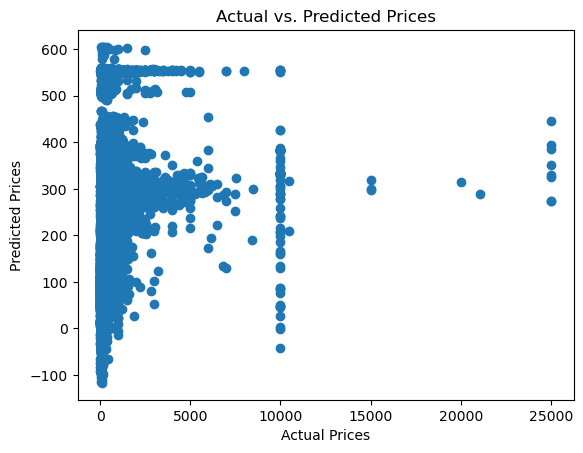

In [94]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [95]:
# Coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Coefficients:', coef)
print('Intercept:', intercept)


Coefficients: [ 1.16011521e-03 -8.38270276e-03 -2.10325731e+01  7.42727244e+01
 -4.03066188e+01 -2.38291779e+01 -4.94195945e+01  2.14362228e+00
  4.66370711e+01 -1.20335793e+02 -9.16760661e+00  8.09033931e+01
  1.20521272e+02 -8.28157227e+01 -1.18608943e+02  5.12491038e+01
  8.34441096e+01  3.20973692e+01  1.08966486e+02  2.17817469e+01
  1.43062586e+01  7.62888832e+01  9.18712026e+01  2.52729014e+00
  1.02554451e+02 -1.45706486e+01  7.45146647e+01 -1.33932307e+01
 -3.82339955e+01 -3.41588762e+01 -9.42312082e+01 -3.90377937e+01
 -1.00385623e+02 -7.33881718e+00  4.76197990e+01  3.92500870e+01
 -1.38521646e+01 -1.12678258e+02 -8.99657784e+01 -8.88958748e+01
 -9.22298483e+01  7.71451809e+01 -8.46445162e+01 -3.33564148e+01
  2.52729014e+00 -8.46445162e+01  7.71451809e+01  1.43062586e+01
 -3.82339955e+01  5.38791161e+01 -1.45706486e+01 -3.41588762e+01
  5.12491038e+01  9.18712026e+01 -5.27658236e+01 -7.33881718e+00
 -1.33932307e+01  8.34441096e+01 -9.22298483e+01 -3.73009059e+00]
Intercept:

In [96]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 163.2607744155538
Mean Squared Error (MSE): 343607.3634926444
Root Mean Squared Error (RMSE): 586.1803165346346
R-squared (R2): 0.034953804431370195


In [97]:
min_price = new_data['price'].min()

# Calculate maximum price
max_price = new_data['price'].max()

# Calculate median price
median_price = new_data['price'].median()

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Median Price: {median_price}")

Minimum Price: 0
Maximum Price: 24999
Median Price: 121.0


In [98]:
zero_count = (new_data['price'] == 0).sum()

print(f"Number of zeros in 'price' column: {zero_count}")

Number of zeros in 'price' column: 62


In [104]:
count_greater_than_1000 = (new_data['price'] > 20000).sum()

print(f"Number of rows with 'price' greater than 1000: {count_greater_than_1000}")

Number of rows with 'price' greater than 1000: 29
